# Model disk rotation curves

Figure 6.6 from Chapter 6 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Plots of model rotation curves for disks
 * exponential disk (solid line)
 * "spherical disk" approximation (dashed line)
 * "point disk" approximation (dotted line)

Circular speeds are normalized in units of $\left(GM_d/R_d\right)^{1/2}$.

The ASCII file `Fig6_6.txt` contains the model rotation curves computed by the author.

In [4]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [5]:
plotFile = 'Fig6_6.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Model disk rotation curves

ASCII text file with model disk rotation curves computed by the author.

Data are 4-column ASCII with comments elimited with a # character:
 * Col 1: R/Rd - galactocentric radius normalized by the disk exponential scale length
 * Col 2: vc_point - "point" disk approximation circular speed
 * Col 3: vc_sphere - "spherical" disk approximation circular speed
 * Col 4: vc_exp - expoential disk circular speed

Speeds in columns 2-4 are normalized in units of $\left(GM_d/R_d\right)^{1/2}$


In [6]:
dataFile = 'Fig6_6.txt'

modelList = ['exp','sphere','point']
modelLS = {'exp':'-','point':':','sphere':'--'}

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

r_rd = np.array(data['R/Rd'])

vCirc = {}

for model in modelList:
    vCirc[model] = np.array(data[f'vc_{model}'])



### Figure 6.3

Plot the three models as follows:
 * true exponential disk - solid
 * "spherical" disk - dashed
 * "point" disk - dotted
 

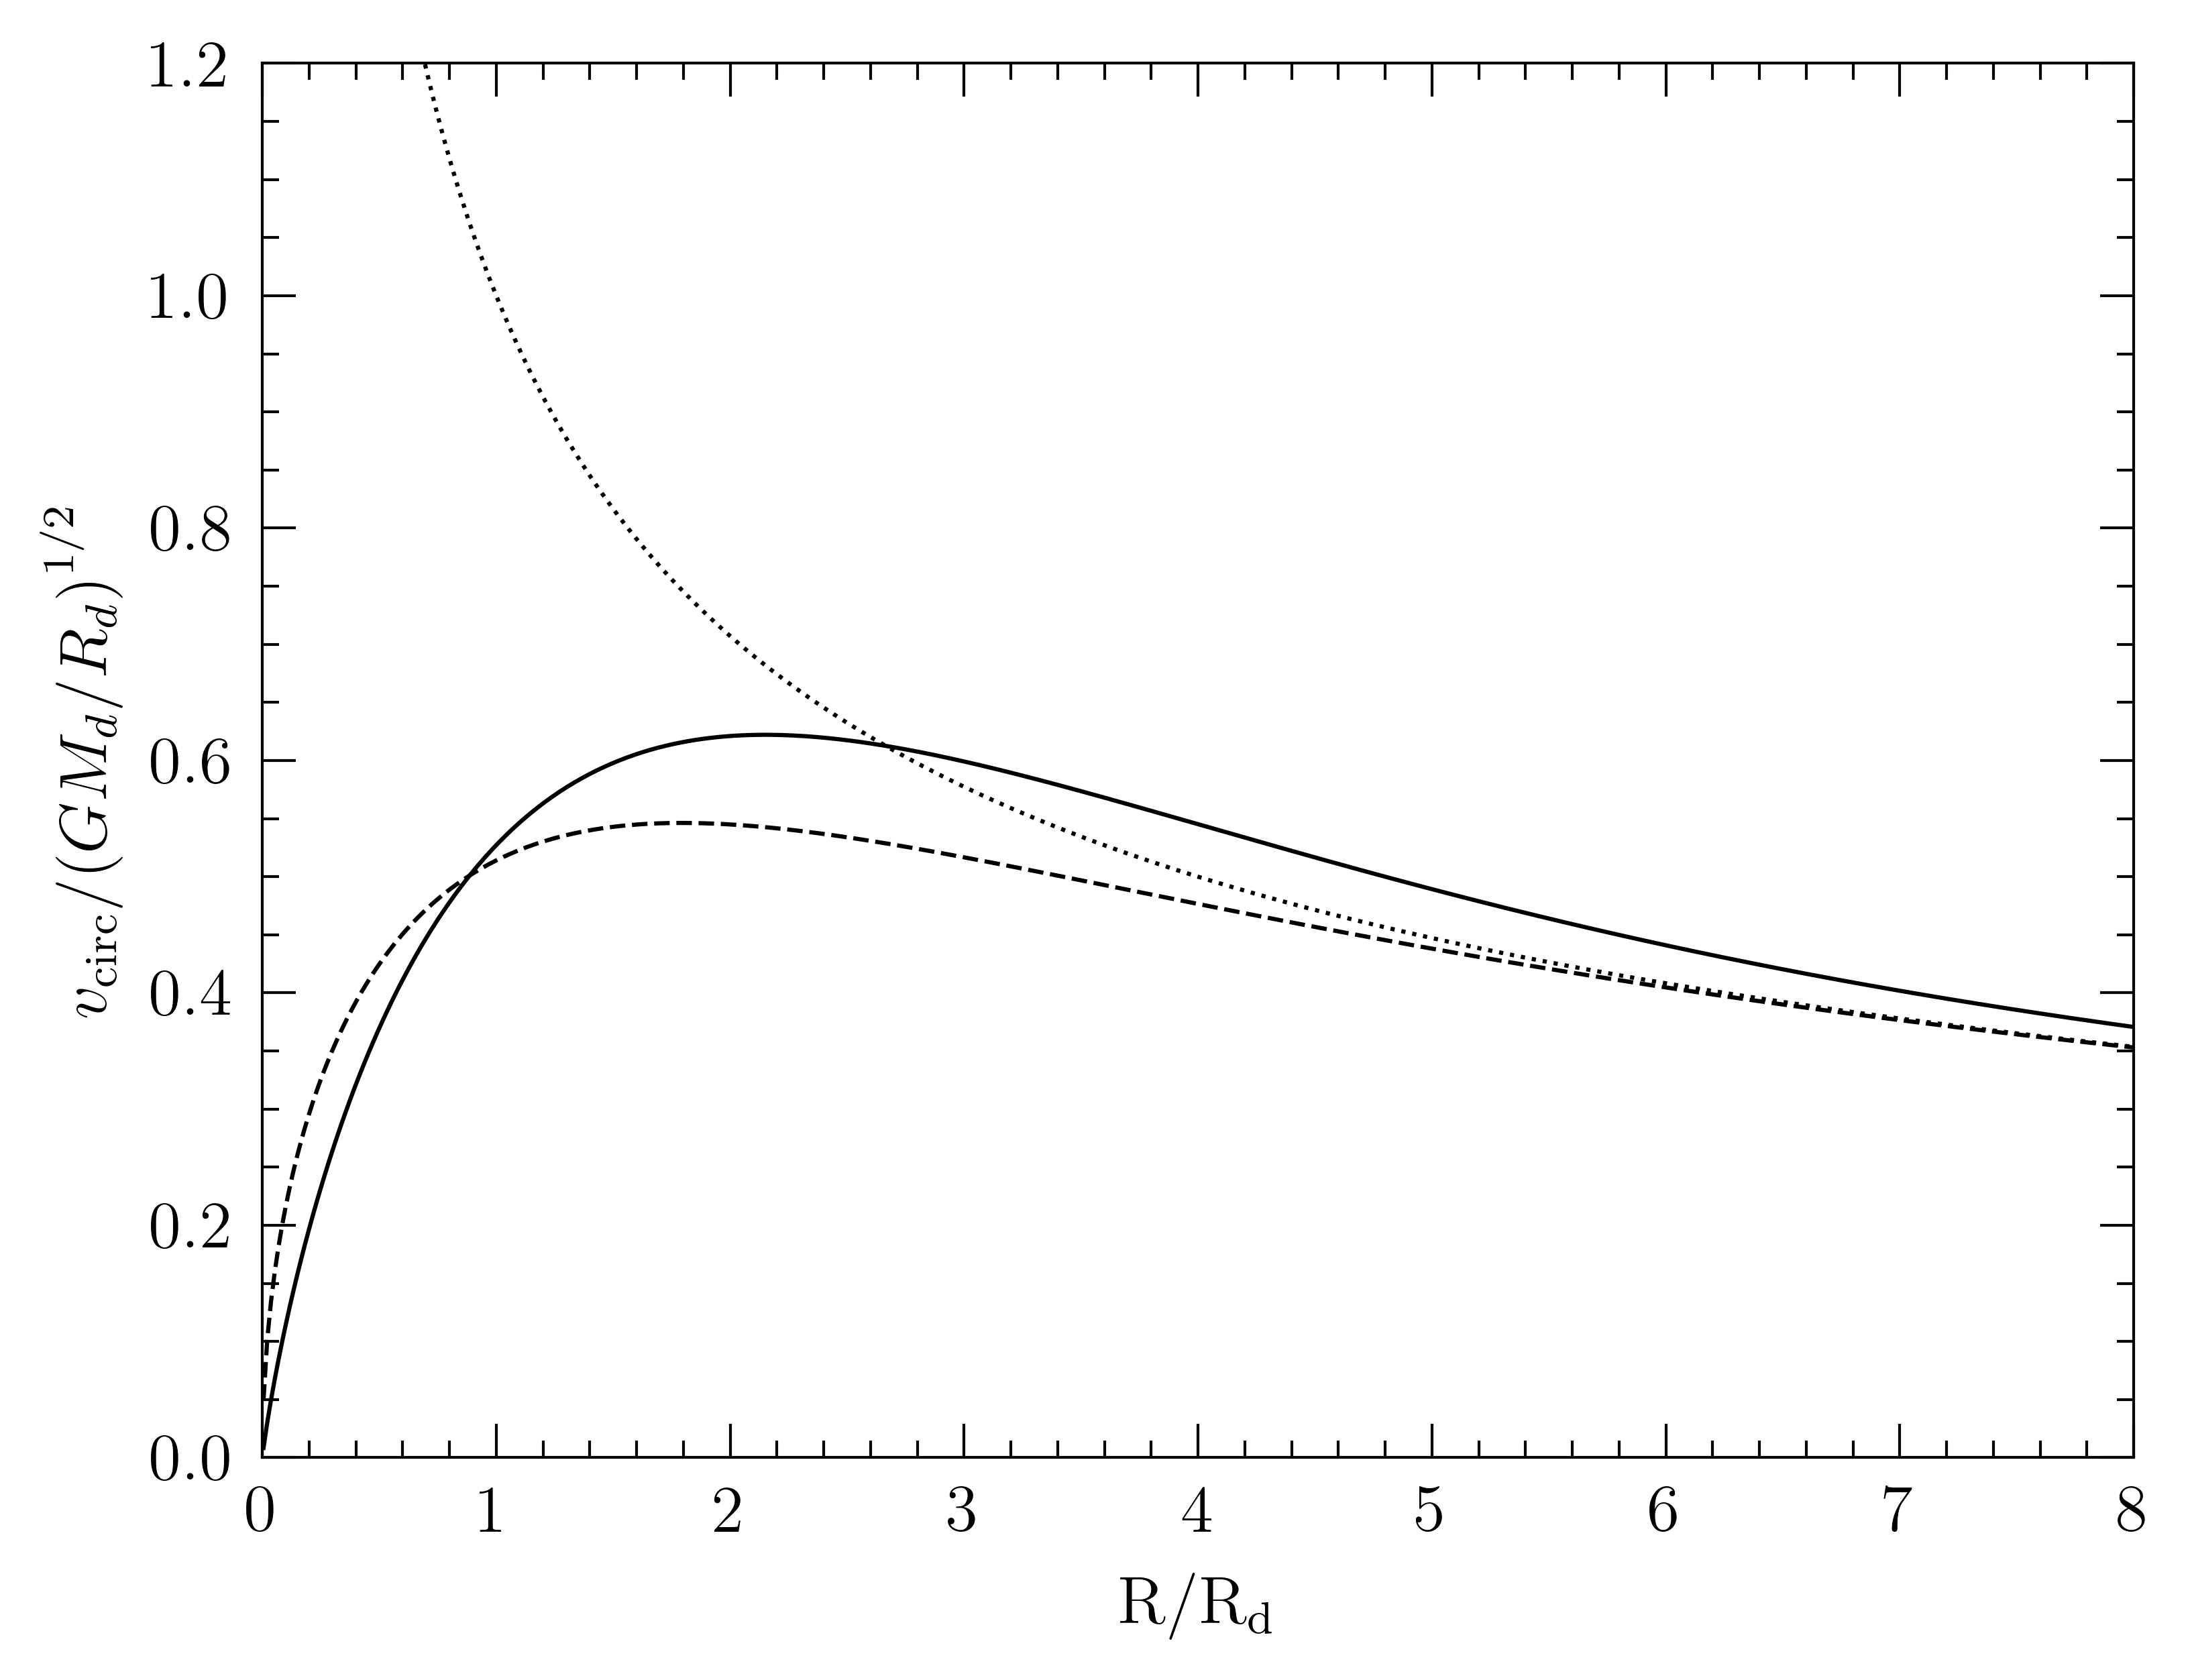

In [7]:
# plotting limits

rMin = 0.0
rMax = 8.0 

vMin = 0.0
vMax = 1.2

fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(rMin,rMax)
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_xlabel(r'R/R$_{\rm d}$',fontsize=axisFontSize)

ax.set_ylim(vMin,vMax)
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_ylabel(r'$v_{\rm circ}$/$\left(GM_d/R_d\right)^{1/2}$',fontsize=axisFontSize)

for model in modelList:
    ax.plot(r_rd,vCirc[model],ls=modelLS[model],lw=0.75,color='black',zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')